<a href="https://colab.research.google.com/github/ianforrest11/DS-Unit-2-Regression-Classification/blob/master/module1/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [X] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [X] After you remove outliers, what is the mean price in your subset of the data?
- [X] Choose a feature, and plot its relationship with the target.
- [X] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [X] Define a function to make new predictions and explain the model coefficient.
- [X] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [X] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [X] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [X] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
import numpy as np
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

The mean price of the adjusted dataset is: 3762.0


'$1,782 estimated price at 40.6 latitude in New York City. Each additional east-bound latitude marker is associated with a $16,558 increase in this model.'

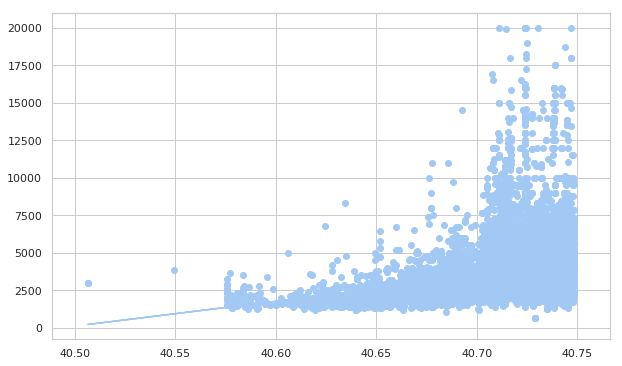

In [283]:
# Set latitude and longitude of NYC
# set price below $20,000

df = df[(df['latitude']>=40.505867) & (df['latitude']<=40.748163)]
df = df[(df['longitude']>=-74.248192) & (df['longitude']<=-73.909600)]
df = df[(df['price'] <= 20000) & (df['price']>200)]


# calculate mean price of dataset
df.describe()

# print mean price of dataset after removing outliers
print("The mean price of the adjusted dataset is:", round(df['price'].mean(),0))

# plot relationship between latitude and price
px.scatter(df, x = 'latitude', y = 'price', trendline='ols')

# run linear regression
model = LinearRegression()

# define features and target, and respective variables
features = ['latitude']
target = 'price'
X = df[features]
y = df[target]

# fit model
model.fit(X,y)

# apply model
y_pred = model.predict(X)

# print model
plt.scatter(X,y)
plt.plot(X, y_pred)


# create predict function
def predict(latitude):
    y_pred = model.predict([[latitude]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    result = f'${estimate:,.0f} estimated price at {latitude} latitude in New York City.'
    explanation = f' Each additional east-bound latitude marker is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation
  
predict(40.6)